![dphi banner](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/dphi_banner.png)

# **[Data Sprint #24: Tinder Millennial Match](https://dphi.tech/practice/challenge/60)**

#### **Submission by [Joseph R. Laurel](https://dphi.tech/profile/josephlaurel/)**
#### Based on [Getting Started Code For Data Sprint #24 on DPhi](https://dphi.tech/notebooks/841/manish_kc_06/data-sprint-24-tinder-millennial-match)

# Loading Libraries

In [22]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# IMPORT GENERIC PACKAGES
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

sns.set(rc={'figure.figsize':(20,10)}, palette="PiYG", style='white')

from sklearn.model_selection import train_test_split # split dataset

# Loading Dataset

In [23]:
# In read_csv() function, we have passed the location to where the files are located in the dphi official github page.
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/train_set_label.csv")

## Basic EDA

In [24]:
train_data.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1896 non-null   float64
 1   Segment type              1896 non-null   object 
 2   Segment Description       1896 non-null   object 
 3   Answer                    1896 non-null   object 
 4   Count                     1896 non-null   float64
 5   Percentage                1896 non-null   float64
 6   It became a relationship  1896 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 103.8+ KB


In [26]:
cat_train = train_data.select_dtypes('object')

In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
encoded_train = ohe.fit_transform(cat_train).toarray()
train = pd.DataFrame(encoded_train, columns=ohe.get_feature_names(cat_train.columns))

In [28]:
# Import the One Hot Encoder (OHE) package to represent categorical variables numerically
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OHE
ohe = OneHotEncoder(handle_unknown = 'ignore')

In [29]:
# Perform the encoding on the training data
encoded_train = ohe.fit_transform(cat_train).toarray()

# Convert the encoded training data to a pandas dataframe for easier viewing
train = pd.DataFrame(encoded_train, columns=ohe.get_feature_names(cat_train.columns))

# View the encoded dataframe
train.head()

,Segment type_gender,Segment type_mobile,Segment type_university,Segment type_web,Segment Description_Appalachian State University,Segment Description_Arizona State University,Segment Description_Arkansas State University,Segment Description_Auburn University,Segment Description_Baylor University,Segment Description_Boston College,Segment Description_Boston University,Segment Description_Brigham Young University,Segment Description_Butler University,Segment Description_Cal Poly San Luis Obispo,Segment Description_Cal State Northridge,Segment Description_Carnegie Mellon University,Segment Description_Case Western Reserve University,Segment Description_Castleton State College,Segment Description_Centre College,Segment Description_Chapman University,Segment Description_Clemson University,Segment Description_Colby College,Segment Description_College of William and Mary,Segment Description_Colorado State University,Segment Description_Columbia University,Segment Description_Cornell University,Segment Description_Dartmouth College,Segment Description_Duke University,Segment Description_Elon University,Segment Description_Emory University,Segment Description_Female respondents,Segment Description_Florida International University,Segment Description_Florida State University,Segment Description_George Washington University,Segment Description_Georgetown University,Segment Description_Gonzaga University,Segment Description_Harvard University,Segment Description_Illinois State,Segment Description_Indiana University,Segment Description_Iowa State University,Segment Description_Ithaca College,Segment Description_James Madison University,Segment Description_Johns Hopkins University,Segment Description_Lehigh University,Segment Description_Louisiana State University,Segment Description_Loyola Marymount University,Segment Description_Loyola University Maryland,Segment Description_Male respondents,Segment Description_Marquette University,Segment Description_Massachusetts Institute of Technology,"Segment Description_Meridian, Idaho",Segment Description_Miami University (Ohio),Segment Description_Michigan State University,Segment Description_Michigan Technological University,Segment Description_Middlebury College,Segment Description_Mississippi State University,Segment Description_Mobile respondents,Segment Description_Morehead State University,Segment Description_New York University,Segment Description_North Carolina State,Segment Description_Northern Arizona University,Segment Description_Northern Illinois University,Segment Description_Northwestern University,Segment Description_Ohio State University,Segment Description_Ohio University,Segment Description_Old Dominion University,Segment Description_Penn State University,Segment Description_Pepperdine University,Segment Description_Princeton University,Segment Description_Providence College,Segment Description_Purdue University,Segment Description_Quinnipiac University,Segment Description_Randolph-Macon College,Segment Description_Rice University,Segment Description_Rochester Institute of Technology,Segment Description_Roger Williams University,Segment Description_Sacred Heart University,Segment Description_San Diego State University,Segment Description_Santa Clara University,Segment Description_Skidmore College,Segment Description_Southern Methodist University,Segment Description_St. Lawrence University,Segment Description_Stanford University,Segment Description_Syracuse University,Segment Description_Texas A&M University,Segment Description_Texas Christian University,Segment Description_Texas Tech University,Segment Description_Tufts University,Segment Description_Tulane University,Segment Description_UMass Amherst,Segment Description_Union College,Segment Description_United States Naval Academy,Segment Description_University of Alabama,Segment Description_University of Arizona,Segment Description_University of Arkansas,Segment Description_University of Buffalo,"Segment Description_Universit

In [30]:
#Describe the Categorical Features. Check if Number of Unique Values is as expected. 
train.describe()

,Segment type_gender,Segment type_mobile,Segment type_university,Segment type_web,Segment Description_Appalachian State University,Segment Description_Arizona State University,Segment Description_Arkansas State University,Segment Description_Auburn University,Segment Description_Baylor University,Segment Description_Boston College,Segment Description_Boston University,Segment Description_Brigham Young University,Segment Description_Butler University,Segment Description_Cal Poly San Luis Obispo,Segment Description_Cal State Northridge,Segment Description_Carnegie Mellon University,Segment Description_Case Western Reserve University,Segment Description_Castleton State College,Segment Description_Centre College,Segment Description_Chapman University,Segment Description_Clemson University,Segment Description_Colby College,Segment Description_College of William and Mary,Segment Description_Colorado State University,Segment Description_Columbia University,Segment Description_Cornell University,Segment Description_Dartmouth College,Segment Description_Duke University,Segment Description_Elon University,Segment Description_Emory University,Segment Description_Female respondents,Segment Description_Florida International University,Segment Description_Florida State University,Segment Description_George Washington University,Segment Description_Georgetown University,Segment Description_Gonzaga University,Segment Description_Harvard University,Segment Description_Illinois State,Segment Description_Indiana University,Segment Description_Iowa State University,Segment Description_Ithaca College,Segment Description_James Madison University,Segment Description_Johns Hopkins University,Segment Description_Lehigh University,Segment Description_Louisiana State University,Segment Description_Loyola Marymount University,Segment Description_Loyola University Maryland,Segment Description_Male respondents,Segment Description_Marquette University,Segment Description_Massachusetts Institute of Technology,"Segment Description_Meridian, Idaho",Segment Description_Miami University (Ohio),Segment Description_Michigan State University,Segment Description_Michigan Technological University,Segment Description_Middlebury College,Segment Description_Mississippi State University,Segment Description_Mobile respondents,Segment Description_Morehead State University,Segment Description_New York University,Segment Description_North Carolina State,Segment Description_Northern Arizona University,Segment Description_Northern Illinois University,Segment Description_Northwestern University,Segment Description_Ohio State University,Segment Description_Ohio University,Segment Description_Old Dominion University,Segment Description_Penn State University,Segment Description_Pepperdine University,Segment Description_Princeton University,Segment Description_Providence College,Segment Description_Purdue University,Segment Description_Quinnipiac University,Segment Description_Randolph-Macon College,Segment Description_Rice University,Segment Description_Rochester Institute of Technology,Segment Description_Roger Williams University,Segment Description_Sacred Heart University,Segment Description_San Diego State University,Segment Description_Santa Clara University,Segment Description_Skidmore College,Segment Description_Southern Methodist University,Segment Description_St. Lawrence University,Segment Description_Stanford University,Segment Description_Syracuse University,Segment Description_Texas A&M University,Segment Description_Texas Christian University,Segment Description_Texas Tech University,Segment Description_Tufts University,Segment Description_Tulane University,Segment Description_UMass Amherst,Segment Description_Union College,Segment Description_United States Naval Academy,Segment Description_University of Alabama,Segment Description_University of Arizona,Segment Description_University of Arkansas,Segment Description_University of Buffalo,"Segment Description_Universit

In [31]:
# Drop the categorical columns from the original training dataset
train_data = train_data.drop(cat_train.columns, axis = 1)

# Add the encoded categorical columns to the original training dataset
train_data = pd.concat([train_data, train], axis = 1)

In [32]:
# Drop Answer_No column to avoid multicollinearity with Answer_Yes Column
train_data = train_data.drop('Answer_No', axis = 1)

In [33]:
# View the updated training dataset
train_data.head()

,ID,Count,Percentage,It became a relationship,Segment type_gender,Segment type_mobile,Segment type_university,Segment type_web,Segment Description_Appalachian State University,Segment Description_Arizona State University,Segment Description_Arkansas State University,Segment Description_Auburn University,Segment Description_Baylor University,Segment Description_Boston College,Segment Description_Boston University,Segment Description_Brigham Young University,Segment Description_Butler University,Segment Description_Cal Poly San Luis Obispo,Segment Description_Cal State Northridge,Segment Description_Carnegie Mellon University,Segment Description_Case Western Reserve University,Segment Description_Castleton State College,Segment Description_Centre College,Segment Description_Chapman University,Segment Description_Clemson University,Segment Description_Colby College,Segment Description_College of William and Mary,Segment Description_Colorado State University,Segment Description_Columbia University,Segment Description_Cornell University,Segment Description_Dartmouth College,Segment Description_Duke University,Segment Description_Elon University,Segment Description_Emory University,Segment Description_Female respondents,Segment Description_Florida International University,Segment Description_Florida State University,Segment Description_George Washington University,Segment Description_Georgetown University,Segment Description_Gonzaga University,Segment Description_Harvard University,Segment Description_Illinois State,Segment Description_Indiana University,Segment Description_Iowa State University,Segment Description_Ithaca College,Segment Description_James Madison University,Segment Description_Johns Hopkins University,Segment Description_Lehigh University,Segment Description_Louisiana State University,Segment Description_Loyola Marymount University,Segment Description_Loyola University Maryland,Segment Description_Male respondents,Segment Description_Marquette University,Segment Description_Massachusetts Institute of Technology,"Segment Description_Meridian, Idaho",Segment Description_Miami University (Ohio),Segment Description_Michigan State University,Segment Description_Michigan Technological University,Segment Description_Middlebury College,Segment Description_Mississippi State University,Segment Description_Mobile respondents,Segment Description_Morehead State University,Segment Description_New York University,Segment Description_North Carolina State,Segment Description_Northern Arizona University,Segment Description_Northern Illinois University,Segment Description_Northwestern University,Segment Description_Ohio State University,Segment Description_Ohio University,Segment Description_Old Dominion University,Segment Description_Penn State University,Segment Description_Pepperdine University,Segment Description_Princeton University,Segment Description_Providence College,Segment Description_Purdue University,Segment Description_Quinnipiac University,Segment Description_Randolph-Macon College,Segment Description_Rice University,Segment Description_Rochester Institute of Technology,Segment Description_Roger Williams University,Segment Description_Sacred Heart University,Segment Description_San Diego State University,Segment Description_Santa Clara University,Segment Description_Skidmore College,Segment Description_Southern Methodist University,Segment Description_St. Lawrence University,Segment Description_Stanford University,Segment Description_Syracuse University,Segment Description_Texas A&M University,Segment Description_Texas Christian University,Segment Description_Texas Tech University,Segment Description_Tufts University,Segment Description_Tulane University,Segment Description_UMass Amherst,Segment Description_Union College,Segment Description_United States Naval Academy,Segment Description_University of Alabama,Segment Description_University of Arizona,Segment Description_University of Arkansas,Segment Description_Univers

In [34]:
# Check the ratio of successful to unsuccessful relationships as represented in the training data
train_data['It became a relationship'].value_counts(normalize=True)

# Class imbalance is reasonable enough not to address with resampling techniques

0    0.649262
1    0.350738
Name: It became a relationship, dtype: float64

In [35]:
# List the features in descending order of their correlation with the output variable
pd.set_option("display.max_rows", None, "display.max_columns", None)

df_corr = pd.DataFrame(train_data.corr()['It became a relationship'][:].sort_values(ascending=False))

df_corr

,It became a relationship
It became a relationship,1.000000
Segment type_mobile,0.470778
Percentage,0.311429
Segment type_university,0.203755
Count,0.186139
ID,0.167766
Answer_Yes,0.111976
Answer_I don't use Tinder,0.097264
"Segment Description_Westport, CT",0.091527
Segment Description_University of Mississippi,0.083812


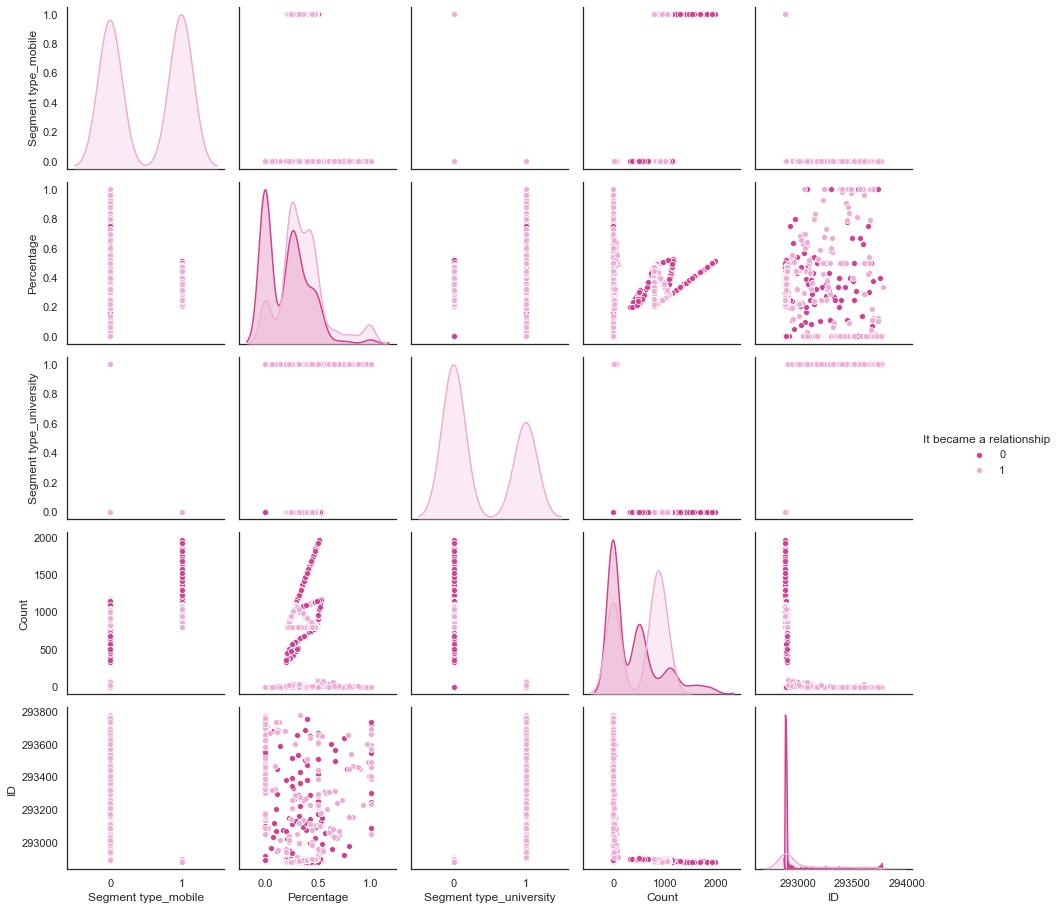

<Figure size 1036.05x900 with 0 Axes>

In [36]:
from IPython.display import Image
import matplotlib.pyplot as plt 

# Create a pairplot of some the top features that are most correlated with the output variable
df_pair = train_data[['It became a relationship', 'Segment type_mobile', 'Percentage', 'Segment type_university','Count','ID']]

# Visually group plots of successful and unsuccessful relationships
sns_plot = sns.pairplot(df_pair.sample(1000), hue = 'It became a relationship')
sns_plot.savefig("pairplot.png")

plt.clf() # Clean pairplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image

# Since there is no clear linear separability between the plots of successful and unsuccessful relationships,
# logistic regression may not provide the optimal accuracy.

# Separating Input Features and Output Features

In [37]:
# Input/independent variables
X = train_data.drop('It became a relationship', axis = 1)   # here we are dropping the class feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = train_data['It became a relationship']             # Output/Dependent variable

# Splitting the data into Train and Validation Set

In [38]:
import math

In [39]:
# Compute for train-test split based on the method of Guyon (1997)

print('Train-test split:', 1-(1/math.sqrt(len(X.columns))),'/',(1/math.sqrt(len(X.columns))))

Train-test split: 0.9201913115532377 / 0.07980868844676221


In [40]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [41]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1/math.sqrt(len(X.columns))), random_state=42)

# Feature Scaling

In [42]:
#Import the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [43]:
#Instantiate the Scaler
scaler = MinMaxScaler()

#Fit to the TRAIN set
scaler.fit(X_train)

#Apply to the TRAIN set
X_train_s = scaler.transform(X_train)

#Apply to the TEST set
X_val_s = scaler.transform(X_val)

# Model Building

## Tuned Random Forest Model

### Hyperparameter Optimization

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 200, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [135,155,175,195]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
print(random_grid)

{'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [135, 155, 175, 195], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [45]:
# Import library for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import the RandomizedSearchCV library
from sklearn.model_selection import RandomizedSearchCV

In [46]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 10, verbose=3, random_state=42, n_jobs = -1)

#rf_random.fit(X_train_s, y_train)

## Show the Random Forest model with the best parameters
#rf_random.best_estimator_

### Model Validation
#### Testing

In [47]:
# Define best estimator
rf_best = RandomForestClassifier(bootstrap=False, max_depth=130, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=155,
                       n_estimators=122)

# Fit the random search model
rf_best.fit(X_train_s, y_train)

# Get predictions 
rf_test = rf_best.predict(X_val_s)

#### Performance Metrics

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cv_rf = cross_val_score(rf_best, X_train_s, y_train, cv=5, scoring='accuracy')
print(cv_rf)
print(cv_rf.mean())

[0.84527221 0.84527221 0.83667622 0.85100287 0.87068966]
0.8497826301748839


## Tuned XGBoost Model

### Hyperparameter Optimization

In [50]:
# Set XGBoost hyperparameters for testing

paramsXGB={
 "learning_rate"    : [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 10, 12, 15, 18, 21, 24, 27, 30],
 "min_child_weight" : [ 7, 9, 11, 13, 15 ],
 "gamma"            : [ 0.2 , 0.3, 0.4, 0.5, 0.6 ],
 "colsample_bytree" : [ 0.5, 0.6, 0.7, 0.8, 0.9 ]
    
}

In [51]:
# Import xgboost library
import xgboost

In [52]:
# Instantiate the XGBoost classifier
xgb = xgboost.XGBClassifier()

# Instantiate the randomized search CV using the hyperparameters for testing
xgb_random=RandomizedSearchCV(xgb,param_distributions=paramsXGB,n_jobs=-1,cv=10,verbose=3, random_state=42)

In [53]:
## Perform the randomized search CV
#xgb_random.fit(X_train_s, y_train)

## Return the best XGBoost estimator
#xgb_random.best_estimator_

### Model Validation
#### Testing

In [54]:
# Define best estimator
xgb_best = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=24,
              min_child_weight=9, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Fit the random search model
xgb_best.fit(X_train_s, y_train)

# Get predictions 
xgb_test = xgb_best.predict(X_val_s)

[19:27:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### Performance Metrics

In [55]:
cv_xgb = cross_val_score(xgb_best, X_train_s, y_train,cv=5, scoring='accuracy')
print(cv_xgb)
print(cv_xgb.mean())

[19:27:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:27:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:27:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:27:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

## Tuned Support Vector Classifier
### Hyperparameter Optimization

In [56]:
# Import the Support Vector Classifier (SVC) library
from sklearn.svm import SVC

In [57]:
# Instantiate the SVC classifier
svc = SVC(probability = True)

# Set hyperparameters to test
param_grid_svc = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [400, 600, 800, 1000, 1200]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [1000, 1200, 1400, 1600, 1800]}]

# Instantiate the randomized search CV using the hyperparameters for testing
clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid_svc, cv = 3, verbose = 3, n_jobs = -1, random_state=42)

In [58]:
## Perform the randomized search CV
#svc_random = clf_svc.fit(X_train_s, y_train)

## Show the best SVC estimator
#svc_random.best_estimator_

### Model Validation
#### Testing

In [59]:
# Define best estimator
svc_best = SVC(C=1000, gamma=1, probability=True)

# Fit the random search model
svc_best.fit(X_train_s, y_train)

# Get predictions 
svc_test = svc_best.predict(X_val_s)

#### Performance Metrics

In [60]:
cv_svc = cross_val_score(svc_best, X_train_s, y_train, cv=5, scoring='accuracy')
print(cv_svc)
print(cv_svc.mean())

[0.9226361  0.91117479 0.92836676 0.93409742 0.91666667]
0.9225883476599808


## Tuned Multilayer Stacking Classifier
### Train Baseline Classifier

In [62]:
from mlxtend.classifier import StackingCVClassifier 

In [63]:
# Initialize the StackingCV classifier
sclf_multi = StackingCVClassifier(classifiers = [rf_best, xgb_best, svc_best],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))

In [64]:
# Fit the multilayer stacking classifier
sclf_multi.fit(X_train_s, y_train)

[19:28:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:28:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:28:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:28:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=False,
                                                         max_depth=130,
                                                         max_features='sqrt',
                                                         min_samples_leaf=2,
                                                         min_samples_split=155,
                                                         n_estimators=122),
                                  XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.5, gamma=0.3,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_cons

### Hyperparameter Tuning

In [65]:
# Define parameter grid 
params_sclf = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}


# Initialize RandomizedSearchCV
random_sclf = RandomizedSearchCV(estimator = sclf_multi, 
                    param_distributions = params_sclf, 
                    cv = 3,
                    verbose = 3,
                    n_jobs = -1,
                    random_state = 42)

## Fit RandomizedSearchCV
#random_sclf.fit(X_train_s, y_train)

In [66]:
## Show the best sclf estimator
#random_sclf.best_estimator_

### Model Validation
#### Testing

In [67]:
# Define best estimator
sclf_tuned = StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=False,
                                                         max_depth=130,
                                                         max_features='sqrt',
                                                         min_samples_leaf=2,
                                                         min_samples_split=155,
                                                         n_estimators=122),
                                  xgboost.XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.5, gamma=0.3,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                min_child_weight=9,
                                                monotone_constraints='()',
                                                n_estimators=100, n_jobs=4,
                                                num_parallel_tree=1,
                                                random_state=0, reg_alpha=0,
                                                reg_lambda=1,
                                                scale_pos_weight=1, subsample=1,
                                                tree_method='exact',
                                                validate_parameters=1,
                                                verbosity=None),
                                  SVC(C=1000, gamma=1, probability=True)],
                     cv=5,
                     meta_classifier=SVC(C=1, degree=4, kernel='poly',
                                         probability=True),
                     shuffle=False, use_probas=True)

# Fit the random search model
sclf_tuned.fit(X_train_s, y_train)

[19:29:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=False,
                                                         max_depth=130,
                                                         max_features='sqrt',
                                                         min_samples_leaf=2,
                                                         min_samples_split=155,
                                                         n_estimators=122),
                                  XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.5, gamma=0.3,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_cons

#### Performance Metrics

In [68]:
cv_sclf_tuned = cross_val_score(sclf_tuned, X_train_s, y_train, cv=5, scoring='accuracy')
print(cv_sclf_tuned)
print(cv_sclf_tuned.mean())

[19:29:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[0.93409742 0.93123209 0.93409742 0.95702006 0.91666667]
0.9346227316141356


## Predict The Output For Testing Dataset
### Load the Test Dataset

In [69]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/test_set_label.csv')

In [70]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   632 non-null    float64
 1   Segment type         632 non-null    object 
 2   Segment Description  632 non-null    object 
 3   Answer               632 non-null    object 
 4   Count                632 non-null    float64
 5   Percentage           632 non-null    float64
dtypes: float64(3), object(3)
memory usage: 29.8+ KB


### Data Preprocessing
#### Convert Categorical Values to Numerical Values

In [71]:
cat_test = test_data.select_dtypes('object')

In [72]:
encoded_test = ohe.transform(cat_test).toarray()
test = pd.DataFrame(encoded_test, columns=ohe.get_feature_names(cat_test.columns))

In [ ]:
test_data = test_data.drop(cat_test.columns, axis = 1)
test_data = pd.concat([test_data, test], axis = 1)

In [75]:
# Check if the converted test data has the correct number of columns
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Columns: 158 entries, ID to Answer_Yes
dtypes: float64(158)
memory usage: 780.2 KB


#### Feature Selection

In [76]:
# Drop Answer_No column to avoid multicollinearity with Answer_Yes Column
test_data = test_data.drop('Answer_No', axis = 1)

#### Feature Scaling

In [77]:
# Instantiate the Scaler
scaler = MinMaxScaler()

# Fit to the test dataset
scaler.fit(test_data)

# Apply to the test dataset
test_data_s = scaler.transform(test_data)

### Generate Predictions

In [78]:
target = sclf_tuned.predict(test_data_s)

### Save Prediction Results Locally

In [79]:
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("submission2.csv")      # the csv file will be saved locally on the same location where this notebook is located.